# Decision Trees

### Breast Cancer Dataset

When working with the breast cancer dataset, we attempt to answer the question: can we predict if a tissue sample is cancerous, based only on its shape?

The breast cancer dataset consists of measurements of samples taken from breast tumors, which are classified as malignant (cancerous) or benign (non-cancerous). The various measurements describe the shape of the sample.

As we've done with other datasets, we can load the breast cancer dataset from our camp's github repository using pandas.

In [ ]:
import pandas as pd

bc_data = pd.read_csv('https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/breast_cancer.csv')

Before we start to create decision trees using our data, let's do some exploratory data analysis.

Let's start by taking a peak at the data.

In [ ]:
bc_data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Let's look at the column names and the shape.

In [ ]:
bc_data.columns

Index(['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32'],
      dtype='object')

In [ ]:
bc_data.shape

(569, 33)

We can see that this dataset contains measurements from 569 tumors, as well as the diagnosis for whether the tumor was malignant (M) or benign (B). For more information on what these measurements are, you can read about the data set [here](https://www.kaggle.com/uciml/breast-cancer-wisconsin-data).

Let's look at the diagnosis column, to see how many of each type of tumor there were.

In [ ]:
bc_data['diagnosis'].value_counts()

,count
diagnosis,
B,357
M,212


So there are 357 benign tumors and 212 malignant tumors in the dataset.

Next, let's try some visualization. Since there are so many columns, it would take a long time for seaborn to generate pairplots for all of the measurements. In the interest of time, let's only look at a few of them. If you're interested, you can take some time to explore others as well!

<Figure size 640x480 with 0 Axes>

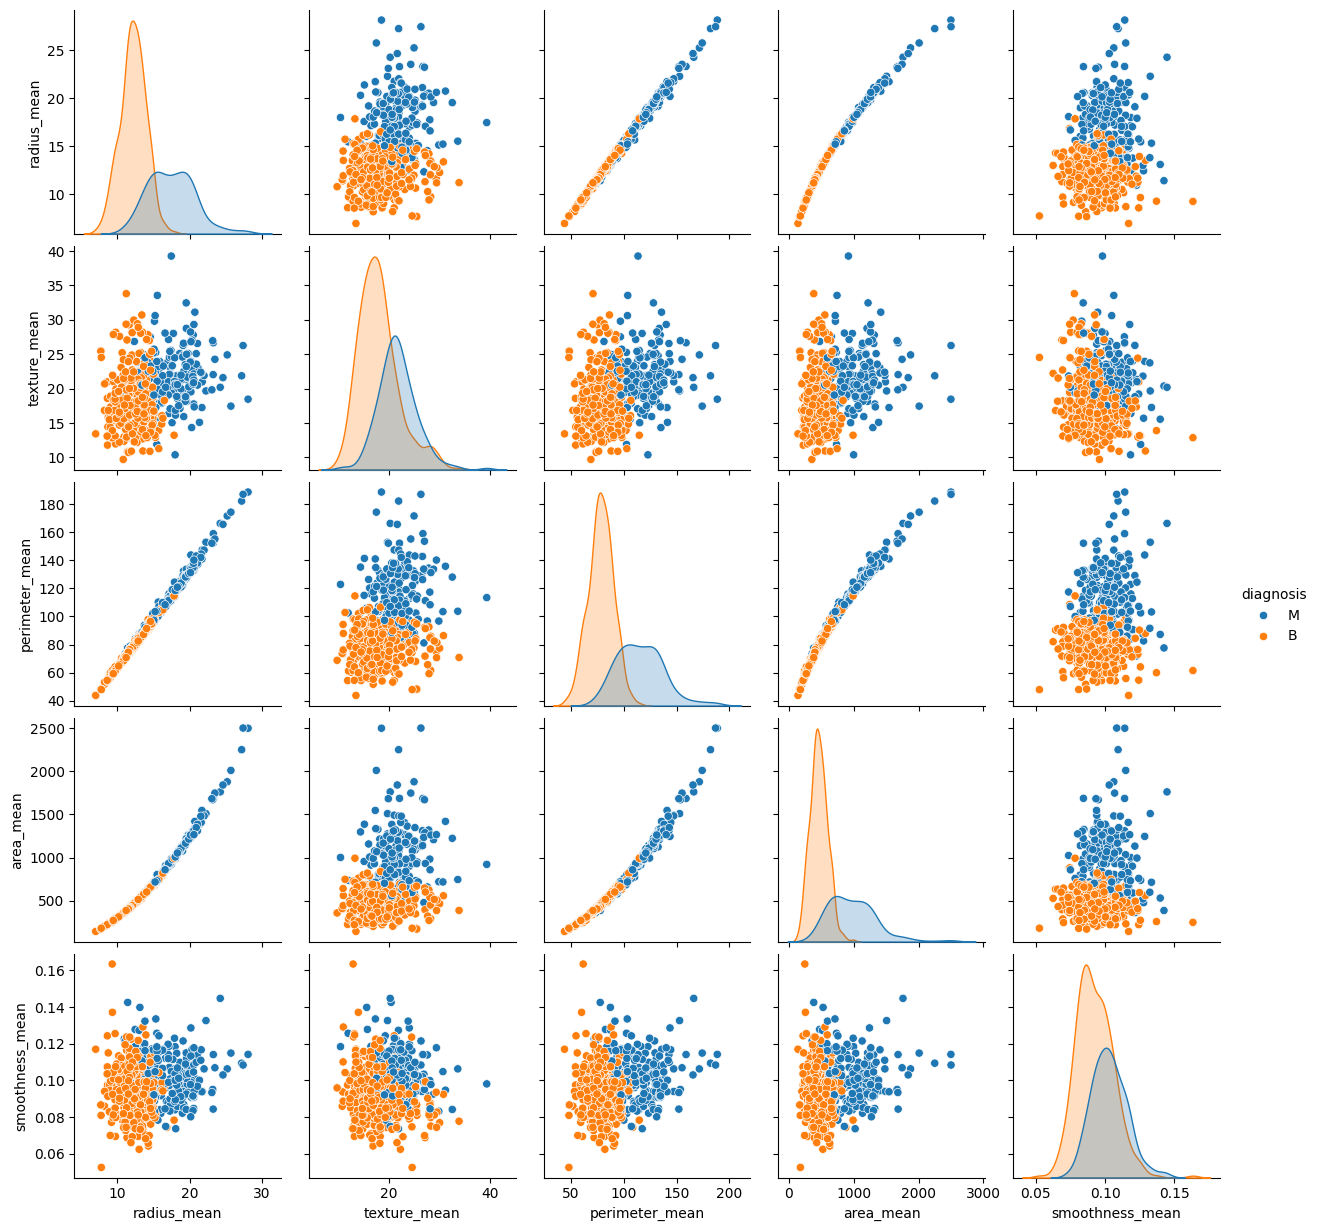

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure()
sns.pairplot(bc_data, vars=['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean'], hue = "diagnosis")
plt.show()

# STOP HERE! 🛑





*   Which features are correlated and which show distinct groupings?
*   Does this data look promising for machine learning?
*   Do any of these relationships suprise you? Or do they make sense?



# Lets continue! 🟢

We'll split the dataset into training and testing data. We'll later use the training data to train our decision tree, and then use the testing data to evaluate how well our decision tree performs.

For our split, we'll take 75% of the data for training, and leave 25% for testing. We'll choose to seed the random split using the number 42, just for fun.

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

feature_names = ['radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst']

x = bc_data[feature_names].values
y = bc_data['diagnosis'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)

Let's use the training set to fit the decision tree.

In [ ]:
from sklearn import tree

clf = tree.DecisionTreeClassifier()
clf = clf.fit(x_train, y_train)

Now, let's see how well our decision tree performs on the testing set. We use the decision tree classifier that we just created to predict if the samples from the testing set are malignant or benign, based on their measurements.

In [ ]:
y_pred = clf.predict(x_test)

Now, let's look at the confusion matrix to see how the predictions for the testing data compare to the actual classifications of tumors.

In [ ]:
confusion_matrix(y_test, y_pred)

array([[83,  6],
       [ 3, 51]])

We can also compute the accuracy of our model on the testing data.

In [ ]:
accuracy_score(y_pred, y_test)

0.9370629370629371

# STOP HERE! 🛑



*   What is this confusion matrix telling us?
*   Is this a good accuracy?
*   Do you think its possible to achieve better results? Why or why not?



# Lets continue! 🟢

The accuracy above is the **testing** accuracy; that is, the accuracy on the held-out testing data that the algorithm did not have access to.

We can also compute the training accuracy. This is the accuracy on the data the algorithm was trained on. For decision trees, this can often be close to 100%, due to the ease with which decision trees overfit data.

In [ ]:
y_pred = clf.predict(x_train)
accuracy_score(y_pred, y_train)

1.0

# STOP HERE! 🛑



*   This accuracy is 100%! Does this mean we have an amazing classifier?
*   Why is this accuracy so different?
*   Why is overfitting so bad?



# Lets continue! 🟢



Finally, let's see what the decision tree looks like. For this dataset, we have much more complicated data than we had for our small example, and we see that we end up with a more complicated tree.

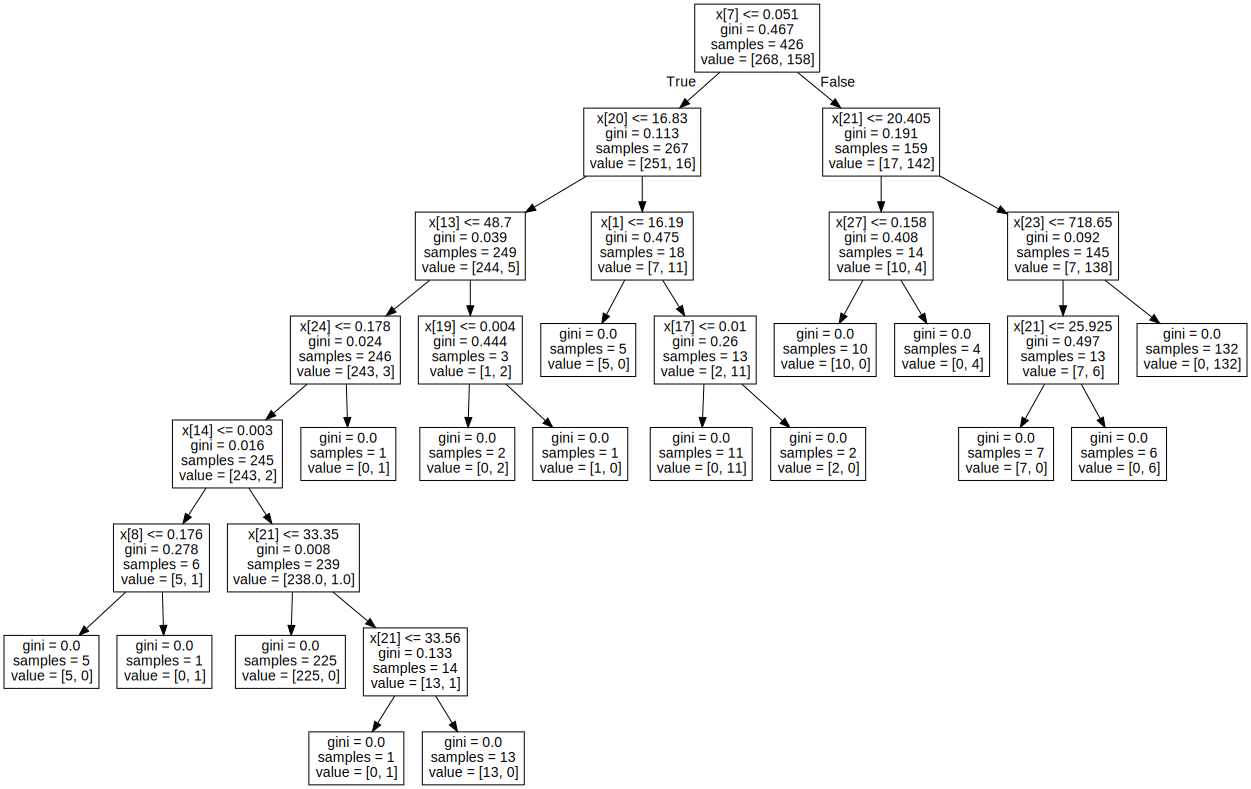

In [ ]:
import graphviz

dot_data = tree.export_graphviz(clf, out_file=None)
graph = graphviz.Source(dot_data)
graph

We can look back at the features we used, to find which ones are being used at the various split points in the tree.

In [ ]:
print(feature_names[7])
print(feature_names[20])
print(feature_names[21])

concave points_mean
radius_worst
texture_worst


# STOP HERE! 🛑



*   Overall how do you think our model did?
*   Should both types of misclassification errors be treated equally? That is, is it worse to classify a benign tumor as malignant, or is it worse to classify a malignant tumor as benign? What are the consequences of each misclassification?



For decision trees, one way to reduce overfitting is to limit the depth of the tree. This is a parameter that you can control when you create the classifier. For more information on the additional options and parameters you can tune, see the documentation: https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Lets continue! 🟢

## Random forests

Another method for reducing overfitting is using something called a *random forest*, instead of a single decision tree. If you put a lot of trees together.... you get a forest! Essentially, we will train a lot of decision trees, and then combine their information to get a model that performs better than any of the individual trees.

So far, we have:
* made a single decision tree by hand from all the data we had
* split our data into training and testing sets, so that we could make a decision tree on the training data and test the accuracy of the model on our testing data,
* and looked over our shoulders at our neighbors' decision trees and noticed that sometimes they're different, even though we started with the same data.

Now, let's do some _ensemble_ learning. Ensemble means "together" in French, and ensemble learning involves putting together lots of models and looking at their average predictions, or the most popular prediction, depending on what you want to do. Random forests involve picking a random subset of the data and fitting a tree, then picking another random subset of the data and making a tree, and making tree after tree until you have a forest.

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf = rf.fit(x_train, y_train)

In [ ]:
rf_pred = rf.predict(x_test)

In [ ]:
accuracy_score(rf_pred, y_test)

0.965034965034965

Python does the random forest part automatically, and our accuracy went up to around 97%.

The accuracy above is **testing** accuracy. Let's check the training accuracy of the random forest model.

In [ ]:
rf_pred = rf.predict(x_train)
accuracy_score(rf_pred, y_train)

1.0

# STOP HERE! 🛑



*   Our accuracy went up! Amazing! Why do you think this happened?
*   But wait, its still overfitting? What are some reasons this could be the case?
*   What's the best balance between training and testing accuracy?
*   When would you use a random forest instead of a decision tree? Always? Only in certain situations?



# Lets continue! 🟢

# Exercise 1: Decision Trees on Iris Data

Next, let's return to the Iris dataset, that we used to practice k-nearest neightbors. Remember that this is available at https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/iris.csv.

Train a decision tree classifier to classify the irises.

In [ ]:
df = pd.read_csv('https://raw.githubusercontent.com/sziccardi/MLCamp2025_DataRepository/main/iris.csv')

Check the accuracy of your classifier - how does this compare to your k-nearest neighbors classifier?

Using graphviz, take a look at the decision tree that you've found.

Check which of the features the decision tree is using to make splits near the top of the tree.

Next, try a random forest. How does this compare to the other methods?

Finally, check to see if your models are overfitting. You can check this for the k-nearest neighbor as well, by going back to that notebook and checking how it performs on the training set.

# Task
Finish the notebook to train and evaluate a decision tree and a random forest classifier on the Iris dataset from "https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv", visualize the decision tree, identify important features, and compare the performance and overfitting of both models.

## Load the iris dataset

### Subtask:
Load the data from the provided URL into a pandas DataFrame.


**Reasoning**:
Load the Iris dataset from the provided URL into a pandas DataFrame and display the first few rows.



In [ ]:
iris_data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
display(iris_data.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


**Reasoning**:
The previous command failed because pandas was not imported. I need to import pandas first and then load the data.



In [ ]:
import pandas as pd
iris_data = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')
display(iris_data.head())

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
